# Grouping unlabeled items using k-means clustering

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

## 10.1 The k-means clustering algorithm
- k-means clustering
    - Pros: Easy to implement
    - Cons: Can converge at local minima; slow on very large datasets
    - Works with: Numeric values

k-평균은 주어진 데이터 집합에 대해 k개의 군집을 찾고자 하는 알고리즘이다. 군집의 개수인 k는 사용자가 정의한다. 각각의 군집은 중심(centroid)이라고 하는 하나의 단일한 점으로 묘사된다. 

#### Listing 10.1 k-means support functions

In [10]:
from numpy import *

def loadDataSet(fileName):      #general function to parse tab -delimited floats
    dataMat = []                #assume last column is target value
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = map(float,curLine) #map all elements to float() function
        dataMat.append(fltLine)
    return dataMat # 중첩list 이중list return 됨.

def distEclud(vecA, vecB): # 유클리드 활용! 
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

def randCent(dataSet, k): # 80 x 2
    n = shape(dataSet)[1] # (80,2)[1] = 2, feature의 개수이다!! 
    centroids = mat(zeros((k,n)))#create centroid mat
    
    #create random cluster centers, within bounds of each dimension
#     for j in range(n):
#         minJ = min(dataSet[:,j]) # 각 column의 min
#         rangeJ = float(max(dataSet[:,j]) - minJ)
#         centroids[:,j] = mat(minJ + rangeJ * random.rand(k,1))
        
    # 위 FOR문 안 쓰고 할 수 있다!! 
    min_data = np.min(dataSet, axis=0)
    range_data = np.max(dataSet, axis=0) - min_data
    print min_data
    print range_data
    print random.rand(k,n)
    centroids = mat(min_data.A + range_data.A *random.rand(k,n))
    #                 1 X 2         1 X 2        3 X 2
    # .A 를 붙여주면 broadcating이 가능해 진다 matrix에서 array가 되니까!! 
    #                                3 x 2         
    
    return centroids


- randCent 에서 center 잡을 때 데이터 셋의 max, min을 잡아서 범위안에서 center 잡도록 설정해 준다!! 

In [4]:
x = ['Hello','world','python','data scientist', 'machine learning']

In [6]:
r2 = map(len, x);r2

[5, 5, 6, 14, 16]

In [7]:
r3 = [len(word) for word in x]; r3

[5, 5, 6, 14, 16]

In [9]:
%timeit r2 = map(len, x);r2
%timeit r3 = [len(word) for word in x]; r3
# list comprehension이 더 빠르다!!! 

The slowest run took 8.32 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 472 ns per loop
1000000 loops, best of 3: 429 ns per loop


In [12]:
pwd  # %cd ../Ch10

u'C:\\pydev\\Machine_Learning\\Machine_Learning_in_Action_py2\\Ch10'

In [53]:
import kMeans
reload(kMeans)
import numpy as np

<module 'kMeans' from 'kMeans.py'>

In [54]:
datMat = np.mat(kMeans.loadDataSet('testSet.txt'))

In [55]:
datMat
type(datMat)

matrix([[ 1.658985,  4.285136],
        [-3.453687,  3.424321],
        [ 4.838138, -1.151539],
        [-5.379713, -3.362104],
        [ 0.972564,  2.924086],
        [-3.567919,  1.531611],
        [ 0.450614, -3.302219],
        [-3.487105, -1.724432],
        [ 2.668759,  1.594842],
        [-3.156485,  3.191137],
        [ 3.165506, -3.999838],
        [-2.786837, -3.099354],
        [ 4.208187,  2.984927],
        [-2.123337,  2.943366],
        [ 0.704199, -0.479481],
        [-0.39237 , -3.963704],
        [ 2.831667,  1.574018],
        [-0.790153,  3.343144],
        [ 2.943496, -3.357075],
        [-3.195883, -2.283926],
        [ 2.336445,  2.875106],
        [-1.786345,  2.554248],
        [ 2.190101, -1.90602 ],
        [-3.403367, -2.778288],
        [ 1.778124,  3.880832],
        [-1.688346,  2.230267],
        [ 2.592976, -2.054368],
        [-4.007257, -3.207066],
        [ 2.257734,  3.387564],
        [-2.679011,  0.785119],
        [ 0.939512, -4.023563],
        

numpy.matrixlib.defmatrix.matrix

In [56]:
datMat.shape, np.shape(datMat)

((80L, 2L), (80L, 2L))

In [57]:
np.min(datMat, axis=0) # np.min(datMat[:,0]) 한번에 구함!! 
np.max(datMat, axis=0)


matrix([[-5.379713, -4.232586]])

matrix([[ 4.838138,  5.1904  ]])

In [58]:
kMeans.randCent(datMat, 3)

min_data :  [[-5.379713 -4.232586]]
range_data :  [[ 10.217851   9.422986]]
random.rand(k,n) :  [[ 0.13771657  0.44450762]
 [ 0.28359584  0.4391117 ]
 [ 0.81042234  0.5241579 ]]


matrix([[-0.49731145,  4.35686931],
        [-5.34552298, -1.37823941],
        [ 1.65595318,  4.66391803]])

#### Listing 10.2 The k-means clustering algorithm

In [28]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))#create mat to assign data points 
                                      #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)

    clusterChanged = True # Flag
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            # 모든 centoid 에 대해 거리를 구함
            for j in range(k):
                # 인스턴스 모든 컬럼의 거리를 구해서 
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                # 최소거리 update
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            
            # 각 row에 대한 min 값이면
            if clusterAssment[i,0] != minIndex: clusterChanged = True
    
            # 인덱스, 오차거리제곱(오차가 줄어드는 방향으로 중심을 옮김)
            clusterAssment[i,:] = minIndex,minDist**2 # 오차 제곱을 같이 저장하겠다!! 
            
        print centroids
        
        # centroids 중심값 update
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]#get all the point in this cluster
            centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean 
    
    return centroids, clusterAssment


In [89]:
reload(kMeans)

<module 'kMeans' from 'kMeans.pyc'>

In [90]:
datMat = mat(kMeans.loadDataSet('testSet.txt'))

In [91]:
myCentroids, clustAssing = kMeans.kMeans(datMat, 4)

min_data :  [[-5.379713 -4.232586]]
range_data :  [[ 10.217851   9.422986]]
random.rand(k,n) :  [[ 0.3165729   0.90208219]
 [ 0.64218639  0.89409028]
 [ 0.96156286  0.97856787]
 [ 0.09096384  0.32963708]]
[[-3.5607668   2.37217322]
 [-4.08217677 -2.68367767]
 [-0.56966569  5.16391809]
 [-0.03337123  0.64288601]]
[[-2.768021    2.65028438]
 [-3.38237045 -2.9473363 ]
 [ 1.2661867   4.0906182 ]
 [ 2.67602415 -0.58882088]]
[[-2.46154315  2.78737555]
 [-3.38237045 -2.9473363 ]
 [ 2.51964406  3.40459212]
 [ 2.85892461 -2.18846761]]
[[-2.46154315  2.78737555]
 [-3.38237045 -2.9473363 ]
 [ 2.6265299   3.10868015]
 [ 2.80293085 -2.7315146 ]]


- 4번 박복한 후에 k-평균이 수렴한 것을 확인할 수 있다.

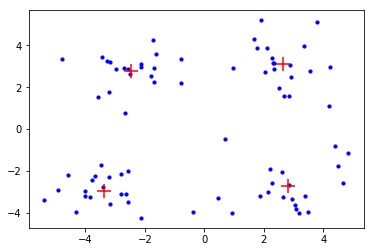

In [92]:
import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(datMat.A[:,0],datMat.A[:,1], color='b', s=10) # x축 좌표
ax.scatter(myCentroids.A[:,0],myCentroids.A[:,1],marker='+', color='r',s=200)

In [83]:
reload(kMeans)

<module 'kMeans' from 'kMeans.pyc'>

In [85]:
datMat = mat(kMeans.loadDataSet('testSet2.txt'))

In [86]:
myCentroids, clustAssing = kMeans.kMeans(datMat, 3)

min_data :  [[-4.822011 -4.168078]]
range_data :  [[ 9.42901  9.06901]]
random.rand(k,n) :  [[ 0.9454095   0.27487176]
 [ 0.44007849  0.28562196]
 [ 0.71575679  0.05794272]]
[[-0.15751322 -2.46952035]
 [-2.9161827   3.78499196]
 [ 0.60035552  4.45508608]]
[[-0.32150057 -2.62473743]
 [-3.06779095  3.33769884]
 [ 2.77880875  3.26115075]]
[[-0.45965615 -2.7782156 ]
 [-2.94737575  3.3263781 ]
 [ 2.93386365  3.12782785]]


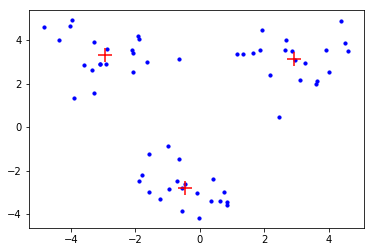

In [88]:
import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(datMat.A[:,0],datMat.A[:,1], color='b', s=10) # x축 좌표
ax.scatter(myCentroids.A[:,0],myCentroids.A[:,1],marker='+', color='r',s=200)

### 10.2 Improving cluster performance with postprocessing
##### Local minimum에 빠지면 잘 못찾을 때도 있다!!! 
- 그래서 후처리로 군집 성능 개선이 필요하다!!! 
- 할당된 군집의 질을 측정하는 데 사용되는 방법으로 SSE(오류 제곱의 합, sum of squared error)가 있다. 
    - SSE가 가장 높은 군집을 두 개의 군집으로 분할하는 것이다!
    
    
    
- merge하는 2가지 방법
    - Two quantifiable ideas are merging the closest centroids or 
        - 가장 가까운 중심끼리 병합하거나
    - merging the two centroids that increase the total SSE the least.
        - 2개의 중심을 merge하는 조합중에 SSE가 가장 적게 증가하는 것을 선택

### 10.3 Bisecting k-means
이것은 하나의 군집을 두 개로 분할한다. 

#### Listing 10.3 The bisecting k-means clustering algorithm

In [108]:
def biKmeans(dataSet, k, distMeas=distEclud):

    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))
    centroid0 = mean(dataSet, axis=0).tolist()[0]
    centList =[centroid0] #create a list with one centroid
    
    for j in range(m):#calculate initial Error
        clusterAssment[j,1] = distMeas(mat(centroid0), dataSet[j,:])**2
    
    while (len(centList) < k): # 중심점을 k개 전까지 계속
        
        lowestSSE = inf
        for i in range(len(centList)):
            ptsInCurrCluster =\
                dataSet[nonzero(clusterAssment[:,0].A==i)[0],:]#get the data points currently in cluster i
            
            # 이등분 하겠다.
            centroidMat, splitClustAss =\
                kMeans(ptsInCurrCluster, 2, distMeas) # 나눠야 할 점들, 몇개로, 거리평균함수 
                
            # split 했을 때 sum of square    
            sseSplit = sum(splitClustAss[:,1])#compare the SSE to the currrent minimum
            
            sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:,0].A!=i)[0],1])
            
            print "sseSplit, and notSplit: ",sseSplit,sseNotSplit # 분할후 SSE / 분할전 SSE
            
            if (sseSplit + sseNotSplit) < lowestSSE: # 왜 더함?! 
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
                
        bestClustAss[nonzero(bestClustAss[:,0].A == 1)[0],0] = len(centList) #change 1 to 3,4, or whatever
        bestClustAss[nonzero(bestClustAss[:,0].A == 0)[0],0] = bestCentToSplit
        print 'the bestCentToSplit is: ',bestCentToSplit
        print 'the len of bestClustAss is: ', len(bestClustAss)
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]#replace a centroid with two best centroids 
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss#reassign new clusters, and SSE

    return mat(centList), clusterAssment


In [94]:
datMat3 = np.mat(kMeans.loadDataSet('testSet2.txt'))

In [110]:
centList, myNewAssments = kMeans.biKmeans(datMat3, 5)

min_data :  [[-4.822011 -4.168078]]
range_data :  [[ 9.42901  9.06901]]
random.rand(k,n) :  [[ 0.87369217  0.3003431 ]
 [ 0.61242082  0.83835912]]
[[-0.26408429 -1.20852489]
 [ 1.06770742  0.71981397]]
[[-0.74459109 -2.39373345]
 [ 0.18204313  3.32057745]]
[[-0.45965615 -2.7782156 ]
 [-0.00675605  3.22710297]]
sseSplit, and notSplit:  453.033489581 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  60
min_data :  [[-1.881012 -4.168078]]
range_data :  [[ 2.726774  3.283645]]
random.rand(k,n) :  [[ 0.93757431  0.62217555]
 [ 0.3081817   0.18462062]]
[[-0.59662248 -2.92186274]
 [-1.56920967 -1.23297741]]
[[-0.15366667 -3.15354   ]
 [-1.3776246  -1.6522424 ]]
[[-0.05200457 -3.16610557]
 [-1.41084317 -1.873139  ]]
[[ -7.11923077e-04  -3.21792031e+00]
 [ -1.31198114e+00  -1.96162114e+00]]
[[ 0.07973025 -3.24942808]
 [-1.26873575 -2.07139688]]
[[ 0.19848727 -3.24320436]
 [-1.26405367 -2.209896  ]]
[[ 0.2642961 -3.3057243]
 [-1.1836084 -2.2507069]]
[[ 0.35496167 -3.36033556]
 [-1.1261

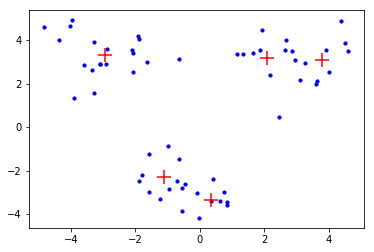

In [111]:
# import matplotlib.pyplot as plt
#%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(datMat3.A[:,0],datMat3.A[:,1], color='b', s=10) # x축 좌표
ax.scatter(centList.A[:,0], centList.A[:,1],marker='+', color='r',s=200)

### 10.4 Example: clustering points on a map

Example: using bisecting k-means on geographic data
1. Collect: 
    - Use the Yahoo! PlaceFinder API to collect data.
2. Prepare: 
    - Remove all data except latitude and longitude.
3. Analyze: 
    - Use Matplotlib to make 2D plots of our data, with clusters and map.
4. Train: 
    - Doesn’t apply to unsupervised learning.
5. Test: 
    - Use biKmeans(), developed in section 10.4.
6. Use: 
    - The final product will be your map with the clusters and cluster centers.

#### Listing 10.4 Yahoo! PlaceFinder API

In [112]:
import urllib
import json
def geoGrab(stAddress, city):
    apiStem = 'http://where.yahooapis.com/geocode?'  #create a dict and constants for the goecoder
    params = {}
    params['flags'] = 'J'#JSON return type
    params['appid'] = 'aaa0VN6k'
    params['location'] = '%s %s' % (stAddress, city)
    url_params = urllib.urlencode(params)
    yahooApi = apiStem + url_params      #print url_params
    print yahooApi
    c=urllib.urlopen(yahooApi)
    return json.loads(c.read())

from time import sleep
def massPlaceFind(fileName):
    fw = open('places.txt', 'w')
    for line in open(fileName).readlines():
        line = line.strip()
        lineArr = line.split('\t')
        retDict = geoGrab(lineArr[1], lineArr[2])
        if retDict['ResultSet']['Error'] == 0:
            lat = float(retDict['ResultSet']['Results'][0]['latitude'])
            lng = float(retDict['ResultSet']['Results'][0]['longitude'])
            print "%s\t%f\t%f" % (lineArr[0], lat, lng)
            fw.write('%s\t%f\t%f\n' % (line, lat, lng))
        else: print "error fetching"
        sleep(1)
    fw.close()

### 10.4.2 Clustering geographic coordinates

#### Listing 10.5 Spherical distance measure and cluster-plotting functions (구면상의 거리를 측정 및 군집하는 Plot 함수)

In [113]:
def distSLC(vecA, vecB):#Spherical Law of Cosines
    a = sin(vecA[0,1]*pi/180) * sin(vecB[0,1]*pi/180)
    b = cos(vecA[0,1]*pi/180) * cos(vecB[0,1]*pi/180) * \
                      cos(pi * (vecB[0,0]-vecA[0,0]) /180)
    return arccos(a + b)*6371.0 #pi is imported with numpy

import matplotlib
import matplotlib.pyplot as plt
def clusterClubs(numClust=5):
    datList = []
    for line in open('places.txt').readlines(): # 4개 column이 있지.
        lineArr = line.split('\t')
        datList.append([float(lineArr[4]), float(lineArr[3])])
    datMat = mat(datList)
    myCentroids, clustAssing = biKmeans(datMat, numClust, distMeas=distSLC)
    fig = plt.figure()
    rect=[0.1,0.1,0.8,0.8]
    scatterMarkers=['s', 'o', '^', '8', 'p', \
                    'd', 'v', 'h', '>', '<']
    axprops = dict(xticks=[], yticks=[])
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    imgP = plt.imread('Portland.png')
    ax0.imshow(imgP)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = datMat[nonzero(clustAssing[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    ax1.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='+', s=300)
    plt.show()

min_data :  [[-122.842918   45.382682]]
range_data :  [[ 0.466614  0.264149]]
random.rand(k,n) :  [[ 0.88926815  0.08636908]
 [ 0.99696671  0.11321619]]
[[-122.44653209   45.49573743]
 [-122.51851799   45.62923634]]
[[-122.59138469   45.48359997]
 [-122.67315276   45.54185774]]
[[-122.57243797   45.49205903]
 [-122.68597792   45.53086706]]
[[-122.56618      45.50641903]
 [-122.70740619   45.51911431]]
[[-122.56409551   45.51016235]
 [-122.70981637   45.51478609]]
sseSplit, and notSplit:  3073.83037159 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  69
min_data :  [[-122.638846   45.39907 ]]
range_data :  [[ 0.262542  0.163645]]
random.rand(k,n) :  [[ 0.62102226  0.00727028]
 [ 0.49040157  0.7532977 ]]
[[-122.62006293   45.53975184]
 [-122.57940911   45.55778194]]
[[-122.613193     45.47913283]
 [-122.54052872   45.52505652]]
sseSplit, and notSplit:  917.077476645 1685.03052602
min_data :  [[-122.842918   45.382682]]
range_data :  [[ 0.201804  0.264149]]
random.rand(k,n) :  

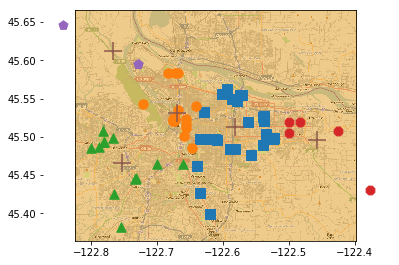

In [115]:
kMeans.clusterClubs()